In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

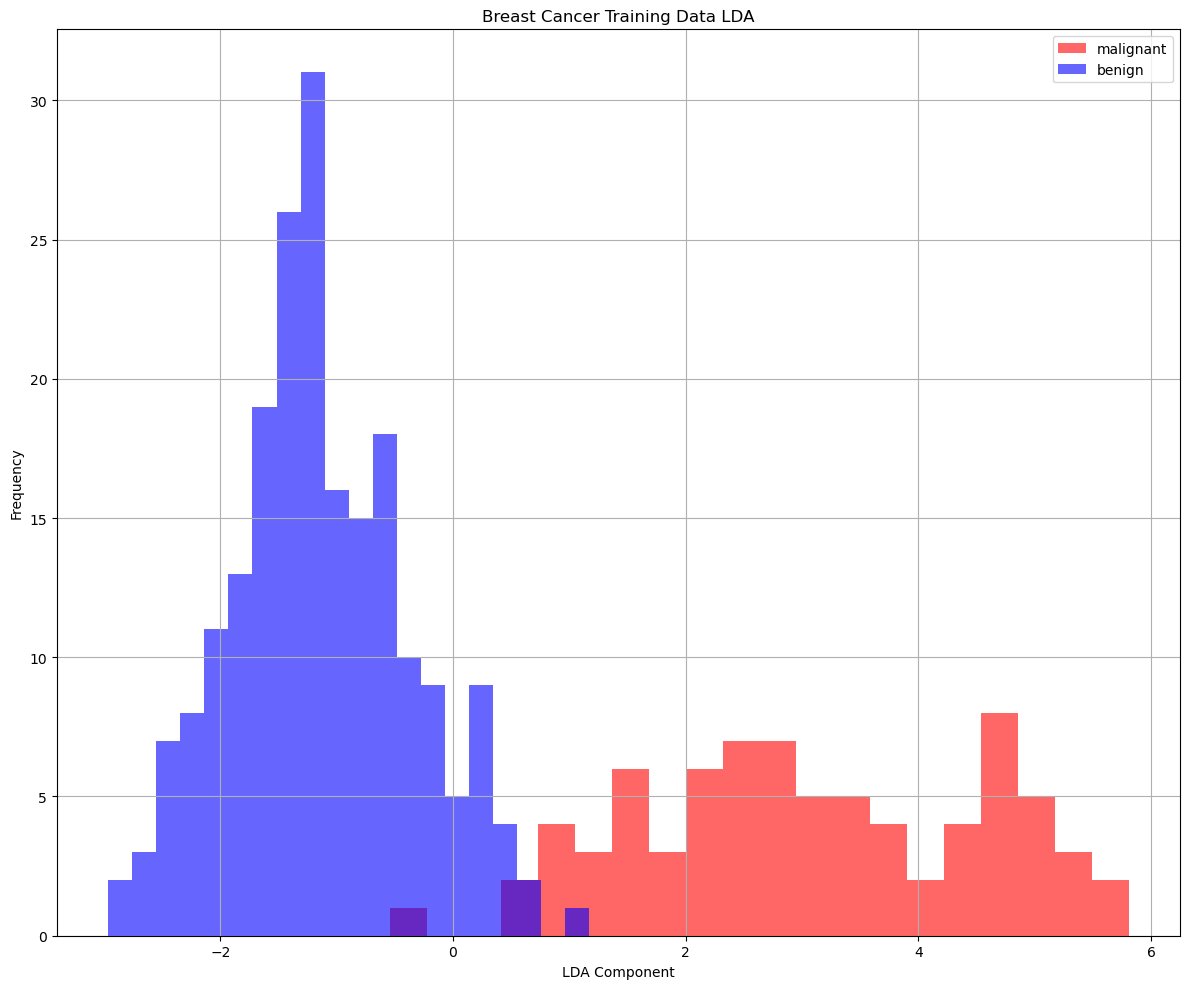

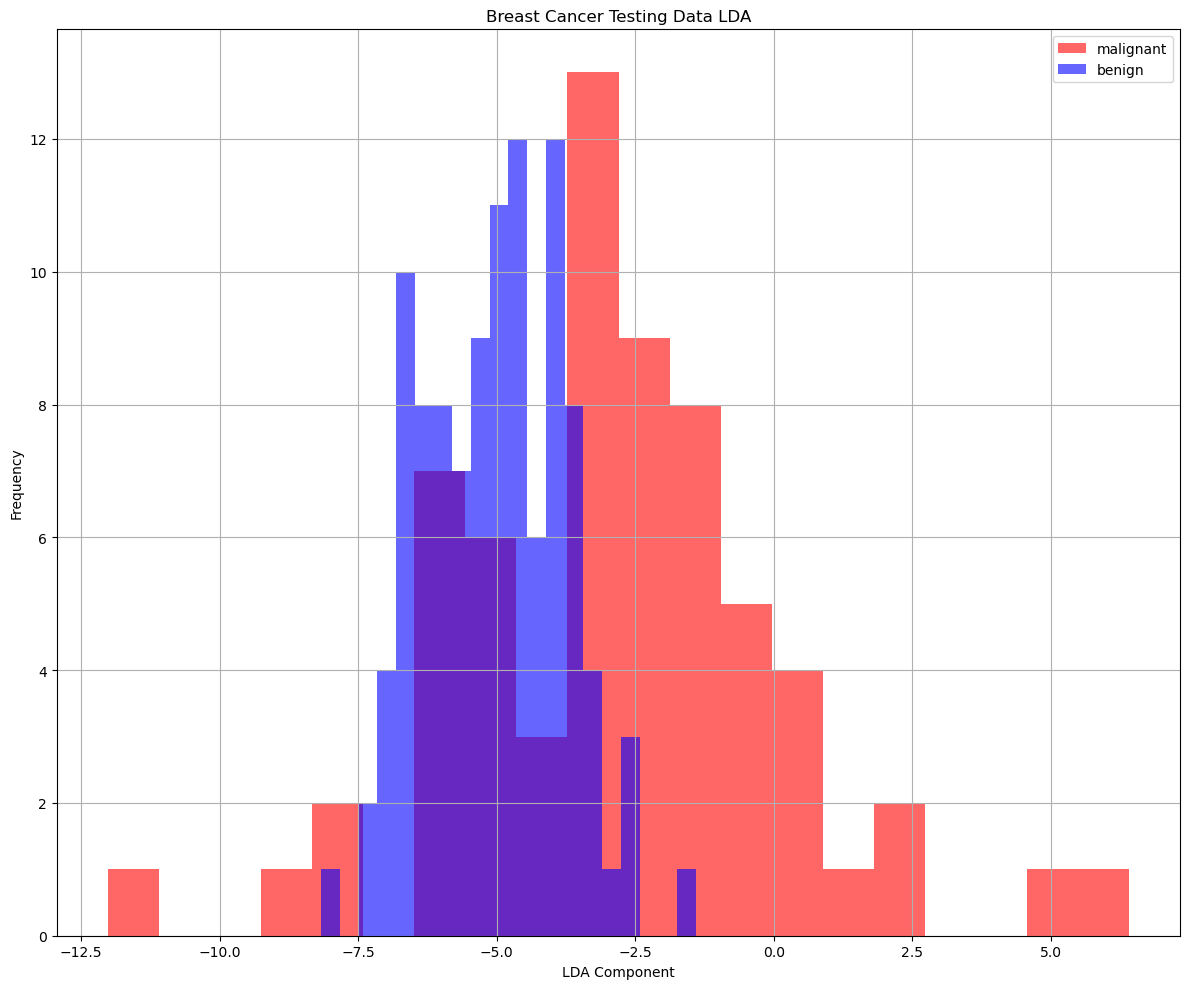

[I 2025-04-27 02:31:56,329] A new study created in memory with name: no-name-fe1a4220-5f69-4d7a-a17d-1b559ffdc943
[I 2025-04-27 02:31:56,371] Trial 0 finished with value: 0.9720508166969146 and parameters: {'n_neighbors': 26, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 28, 'p': 1}. Best is trial 0 with value: 0.9720508166969146.
[I 2025-04-27 02:31:56,528] Trial 1 finished with value: 0.9825166364186326 and parameters: {'n_neighbors': 28, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 13, 'p': 2}. Best is trial 1 with value: 0.9825166364186326.
[I 2025-04-27 02:31:56,568] Trial 2 finished with value: 0.9789473684210526 and parameters: {'n_neighbors': 14, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 45, 'p': 1}. Best is trial 1 with value: 0.9825166364186326.
[I 2025-04-27 02:31:56,609] Trial 3 finished with value: 0.9791288566243195 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'algorithm': 'brute', 'leaf_size': 44, 'p': 1}. Best is trial 

Best trial:
Accuracy: 0.9895946763460376
Best hyperparameters:  {'n_neighbors': 18, 'weights': 'distance', 'algorithm': 'kd_tree', 'leaf_size': 22, 'p': 2}


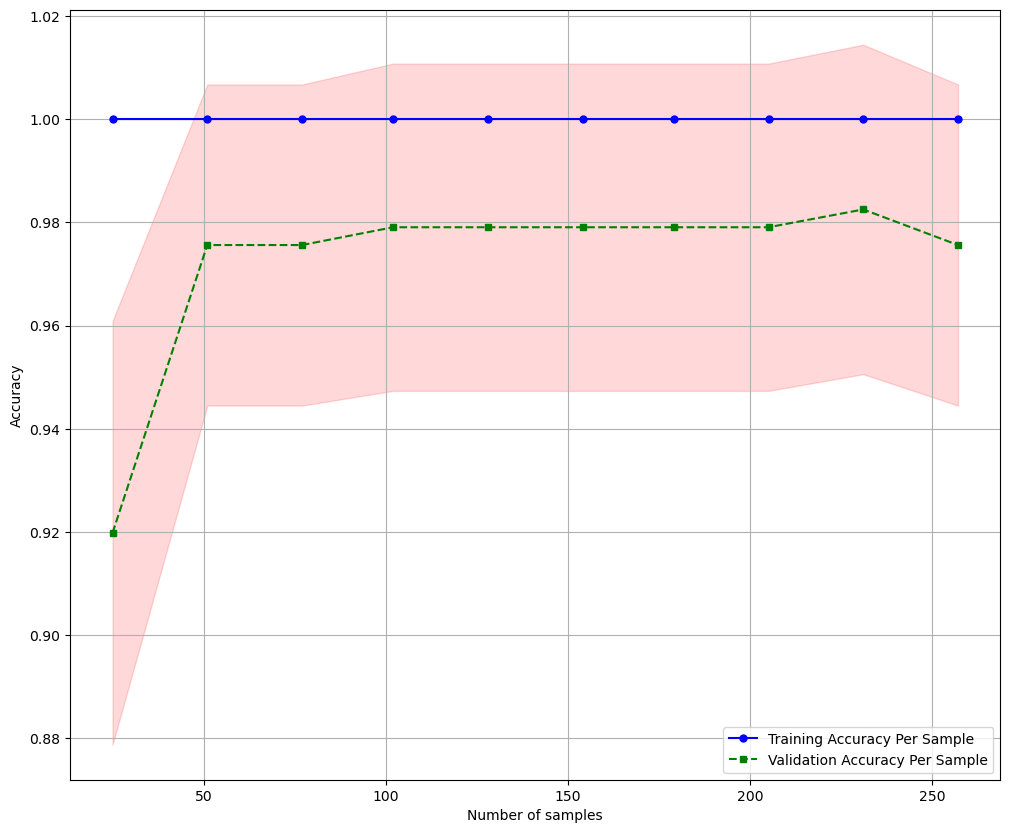

Confusion Matrix
[[  5  59]
 [  0 107]]
Accuracy: 0.6550, Precision: 0.6446, Recall: 1.0000, F1: 0.7839, AUC:0.5703


In [3]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)